# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [15]:
#Membaca dataset dan menampilkannya
df = pd.read_csv('https://raw.githubusercontent.com/riffabella/Submission-Project-Machine-Learning-Pemula/refs/heads/main/data_clustering.csv')
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,14.09,Debit,ATM,70.0,Doctor,81.0,1.0,5112.21,1
1,376.24,Debit,ATM,68.0,Doctor,141.0,1.0,13758.91,1
2,126.29,Debit,Online,19.0,Student,56.0,1.0,1122.35,0
3,184.50,Debit,Online,26.0,Student,25.0,1.0,8569.06,0
4,13.45,Credit,Online,26.0,Student,198.0,1.0,7429.40,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Channel              2512 non-null   object 
 3   CustomerAge          2512 non-null   float64
 4   CustomerOccupation   2512 non-null   object 
 5   TransactionDuration  2512 non-null   float64
 6   LoginAttempts        2512 non-null   float64
 7   AccountBalance       2512 non-null   float64
 8   Cluster              2512 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 176.8+ KB


In [17]:
df['Cluster'].value_counts()

,count
Cluster,
1,1525
0,987


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [18]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2009, 8), (503, 8))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [19]:
column_transformer = ColumnTransformer([
    ('Cat Encoder', TargetEncoder(), make_column_selector(dtype_exclude=np.number))
], remainder='passthrough')

rf_pipeline = Pipeline([
    ('Preprocessor', column_transformer),
    ('Model', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('Preprocessor', column_transformer),
    ('Model', XGBClassifier(random_state=42))
])

**Insight**:
*   **Random Forest (RF)** diterapkan sebagai pengembangan dari Decision Tree, yang menggunakan beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Namun, karena kompleksitasnya, model ini membutuhkan sumber daya komputasi yang lebih besar.
*   **XGBoos dipilih** karena dapat mempercepat proses pelatihan,
 Menggunakan parallel computing untuk mempercepat proses pelatihan. Memiliki kemampuan dalam menangani data yang tidak seimbang, Mencegah terjadinya overfitting.

In [20]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat Encoder',
                                                  TargetEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e58e28f98d0>)])),
                ('Model', RandomForestClassifier(random_state=42))])

In [21]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat Encoder',
                                                  TargetEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e58e28f98d0>)])),
                ('Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               e...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [22]:
print('RF MODEL')
print(classification_report(y_test, rf_pipeline.predict(X_test)))
print()

print('XGB MODEL')
print(classification_report(y_test, xgb_pipeline.predict(X_test)))

RF MODEL
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       190
           1       0.99      1.00      0.99       313

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503


XGB MODEL
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       190
           1       0.99      1.00      0.99       313

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503



Text(956.631313131313, 0.5, 'Actual')

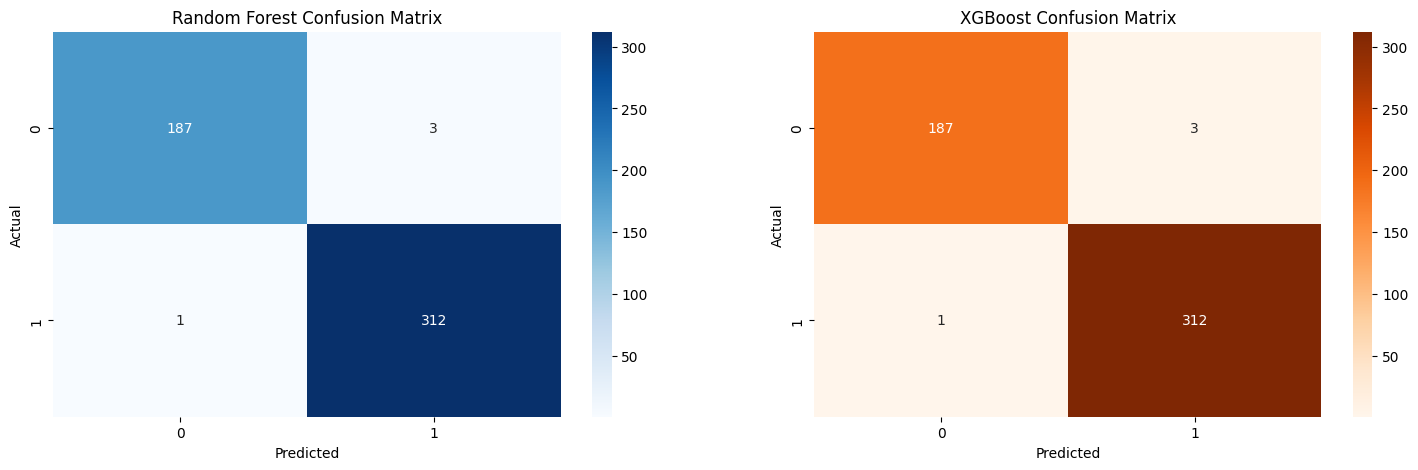

In [23]:
# Generate predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Create subplots
plt.figure(figsize=(18, 5))

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# XGBoost Confusion Matrix
plt.subplot(1, 2, 2)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **Analisis Perbandingan Model: Random Forest vs XGBoost**

Dua model, Random Forest (RF) dan XGBoost (XGB), digunakan untuk klasifikasi dataset dengan tiga kelas (0, 1, dan 2). Berikut adalah analisis berdasarkan confusion matrix dan classification report.


---



**1. Akurasi Keseluruhan**
*   **Random Forest**: 99%
*   **XGB**:99%

Kedua model memiliki akurasi yang sangat tinggi (hampir sempurna, 1.00) pada dataset ini.

****

**2. Analisis Berdasarkan Confusion Matrix**

**Random Forest vs XGBoost**
*   **Kelas 0**:
  *   RF: 187 benar, 1 salah
  *   XGB: 187 benar, 1 salah

*   **Kelas 1**:
  *   RF: 312 benar, 3 salah
  *   XGB: 312 benar, 3 salah

**Kesimpulan dari Confusion Matrix**:

*   Kedua model memiliki hasil yang identik dalam hal klasifikasi.
Kesalahan terjadi pada kelas 0 dengan 3

*   instance salah diklasifikasikan sebagai kelas 1.
*   Kesalahan pada kelas 0 lebih kecil (hanya 1 instance yang salah diklasifikasikan sebagai kelas 0).
*   Dengan jumlah kesalahan yang sama, kedua model memiliki akurasi yang hampir sempurna, yaitu 99%.

****

**Analisis Berdasarkan Classification Report**

**a. Precision, Recall, dan F1-Score**

Metric	Random Forest	XGBoost
Precision (Kelas 2)	0.98	0.98
Recall (Kelas 2)	0.94	0.96
F1-Score (Kelas 2)	0.96	0.97
Macro Avg (Semua Kelas)	0.99	0.99

*   **Precision**: tinggi berarti model jarang salah memprediksi suatu kelas.
*   **Recall** kedua model menghasilkan nilai yang sama dimana pada kelas 0 (0.98 di RF dan XGB) kemudian pada kelas 1 (1.00 di RF dan XGB)
*   **F1-Score** pada kedua model menghasilkan F1 score yang sama yaitu
 berarti lebih baik dalam menangkap seluruh sampel dalam kelas yaitu 0.99 dan nilai tersebut sama dengan kelas lainnya.



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [24]:
# Tambahkan import yang diperlukan
from sklearn.metrics import f1_score

def objective(trial):
    # Define hyperparameter space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
    }

    # Create model dengan parameter yang diuji
    model = XGBClassifier(
        **params,
        random_state=42,
        eval_metric='mlogloss'
    )

    # Buat pipeline
    pipeline = Pipeline([
        ('Preprocessor', column_transformer),
        ('Model', model)
    ])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Prediksi dan hitung metric
    y_pred = pipeline.predict(X_test)
    return f1_score(y_test, y_pred, average='macro')

# Create study dan lakukan optimasi
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Tampilkan parameter terbaik
print("Best parameters:", study.best_params)
print("Best F1-Score:", study.best_value)

[I 2025-03-27 23:32:11,759] A new study created in memory with name: no-name-9a4fee25-fea2-4864-a333-e51d670862e0
[I 2025-03-27 23:32:13,261] Trial 0 finished with value: 0.9851830343428732 and parameters: {'n_estimators': 437, 'max_depth': 7, 'learning_rate': 0.0024177239201469683, 'subsample': 0.9658670532234555, 'colsample_bytree': 0.9567857888731077, 'gamma': 0.28053154231427535}. Best is trial 0 with value: 0.9851830343428732.
[I 2025-03-27 23:32:13,583] Trial 1 finished with value: 0.8945111530549866 and parameters: {'n_estimators': 372, 'max_depth': 7, 'learning_rate': 0.001452853293966029, 'subsample': 0.9504918908047215, 'colsample_bytree': 0.6218230502651346, 'gamma': 0.2879629069717627}. Best is trial 0 with value: 0.9851830343428732.
[I 2025-03-27 23:32:13,914] Trial 2 finished with value: 0.9894164531020524 and parameters: {'n_estimators': 341, 'max_depth': 9, 'learning_rate': 0.009740574063897145, 'subsample': 0.8254827418656928, 'colsample_bytree': 0.8026960009701917, 'g

Best parameters: {'n_estimators': 869, 'max_depth': 3, 'learning_rate': 0.09144789233066751, 'subsample': 0.9859681829176591, 'colsample_bytree': 0.875934079369177, 'gamma': 0.1899274851188147}
Best F1-Score: 0.9915242813331986


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [25]:
# Membuat model dengan parameter terbaik
best_model = XGBClassifier(
    **study.best_params,
    random_state=42,
    eval_metric='mlogloss'
)

xgb_pipeline_tuned = Pipeline([
    ('Preprocessor', column_transformer),
    ('Model', best_model)
])

xgb_pipeline_tuned.fit(X_train, y_train)

# Evaluasi model tuned
print('XGB MODEL TUNED')
print(classification_report(y_test, xgb_pipeline_tuned.predict(X_test)))

XGB MODEL TUNED
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       190
           1       0.99      1.00      0.99       313

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Hasil Evaluasi Model Klasifikasi**

1. Tidak ada perubahan sebelum dan sesudah dilakukan tuning, kedua model tetap memiliki akurasi sempurna 0.99 atau 99%
2. Identifikasi Kelemahan Model
*   Model tidak mengalami Precision atau Recall rendah untuk kelas tertentu, karena semuanya memiliki performa sempurna.
*   Kemungkinan indikasi Overfitting, karena menghasilkan akurasi 99% pada kedua model yang menjadi indikasi bahwa model terlalu "hafal" data latih dan mungkin tidak bekerja baik pada data baru
3. Rekomendasi Tindakan Lanjutan
*   Coba uji model dengan data baru (validasi atau test set) untuk melihat apakah performanya tetap tinggi.
*   Jika ingin memastikan generalisasi model, bisa tambahkan regularisasi atau kurangi kompleksitas model.